# Image Processing

### Color Spaces

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

In [5]:
img = cv2.imread('../data/dog_backpack.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

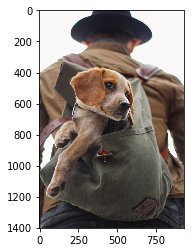

In [6]:
plt.imshow(img)

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

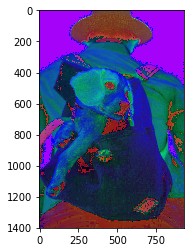

In [8]:
plt.imshow(img)

### Blending images

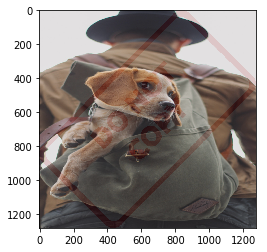

In [9]:
img1 = cv2.imread('../data/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img1 = cv2.resize(img1,(img2.shape[1],img2.shape[0])) # this will distrot image... NOTE INDICES!

# addWeighted works only with images of the same size
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.1,gamma=0)

plt.imshow(blended)

In [23]:
img1 = cv2.imread('../data/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
factor = 0.5
img2 = cv2.resize(img2,(int(factor*img2.shape[1]),int(factor*img2.shape[0])))
large_img = img1
small_img = img2

In [24]:
large_img.shape

(1401, 934, 3)

In [25]:
small_img.shape

(640, 638, 3)

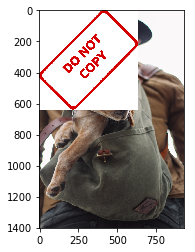

In [26]:
# Watch out: numpy is rows x columns, OpenCV understands x:columns x y:rows
x_offset = 0
y_offset = 0
x_end = x_offset + min(small_img.shape[1],large_img.shape[1])
y_end = y_offset + min(small_img.shape[0],large_img.shape[0])

large_img[y_offset:y_end,x_offset:x_end] = small_img

plt.imshow(large_img)

In [21]:
min(small_img.shape[1],large_img.shape[1])

934

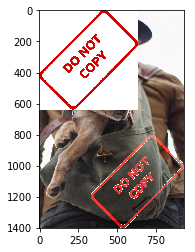

In [27]:
# resize foreground image to fit background image size
img2 = cv2.resize(img2,(600,600))

# Watch out: numpy is rows x columns, OpenCV understands X:columns x Y:rows
# Foreground image pasted on bottom right side
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]
x_end = img1.shape[1]
y_end = img1.shape[0]

# extract ROI: Region of Interest
roi = img1[y_offset:y_end,x_offset:x_end]

# create inverse of the image to mask: all black (value = 0) except part to add white (value = 255)
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
mask_inv = cv2.bitwise_not(img2gray)

# create a mask: all black (value = 0) except part to add (its color values)
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

# apply mask to ROI
final_roi = cv2.bitwise_or(roi,fg)

# insert modified ROI
large_img = img1
small_img = final_roi
large_img[y_offset:y_end,x_offset:x_end] = small_img

# display
plt.imshow(large_img)